In [17]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [18]:
with open('results.json', 'r') as f:
    scores = json.load(f)["scores"]

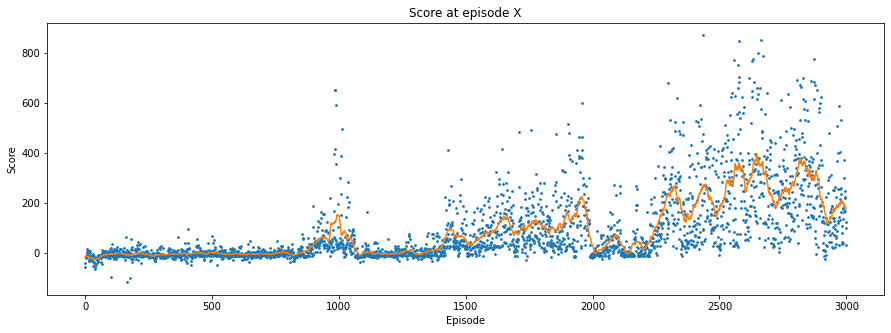

In [39]:
plt.rcParams["figure.figsize"] = (15,5)


def plot(scores):
    plt.title("Score at episode X (with moving average)")
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.plot(list(range(len(scores))), scores, 'p', ms=2)

    window = 20
    smoothed_scores = [np.mean(scores[max(0, i - window):min(len(scores), i + window)]) for i in range(len(scores))]

    # plt.title("Moving average score at episode X")
    # plt.xlabel("Episode")
    # plt.ylabel("Score")
    plt.plot(list(range(len(smoothed_scores))), smoothed_scores)
    plt.show()

plot(scores)

In [20]:
np.mean(scores[max(0, -5):min(len(scores), 5)])

-29.6962387124943

In [29]:
def concatenate_files(file1, file2, output_file):
    with open(file1, 'r') as f:
        scores_1 = json.load(f)["scores"]
    
    with open(file2, 'r') as f:
        scores_2 = json.load(f)["scores"]

    with open(output_file, 'w') as f:
        json.dump({"scores": scores_1 + scores_2}, f)